In [27]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d

In [28]:
#1
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

"""
임신횟수
글루코스 내성 실험 후의 혈당수치
확장기 혈압(mm Hg)
상완 삼두근 피부 두께 (mm)
혈액내 인슐린 수치 (mu U/ml)
BMI(비만도) 수치 (weight in kg/(height in m)^2)
당뇨병 가족력: 계산식은 데이터세트의 출처에서 확인하세요.
나이 (years)
당뇨병 여부 (0 or 1; 1은 발병)
"""

label = ["임신횟수", "글루코스 내성 실험 후의 혈당수치", "확장기 혈압", "상완 삼두근 피부 두께",
         "혈액내 인슐린 수치", "BMI", "당뇨병 가족력", "나이"]


(768, 9)


In [29]:
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)


(768, 9)


In [30]:
dim = 8
x_data = data[:, 0:dim]
y_data = data[:, dim]
print(y_data.shape)
y_data = y_data.reshape(768,1)   
print(x_data.shape)
print(y_data.shape)

(768,)
(768, 8)
(768, 1)


x에는 특성 넣고 y에는 결과(0/1)넣는거라 생각하고,,,,,,?

In [31]:
x_data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]],
      dtype=float32)

In [32]:
y_data

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

1. 학습시키기(line/logist실행)

In [34]:
log_reg=LogisticRegression() 

In [35]:
log_reg.fit(x_data,y_data)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
for i in range(dim):
    print(label[i], log_reg.coef_[0,i])
#     상대적으로 봐야함, 값이 가중치(기울기)를 나타내는 것이기때문에...

임신횟수 0.1359901412917452
글루코스 내성 실험 후의 혈당수치 0.03429416125425302
확장기 혈압 -0.012607102035581491
상완 삼두근 피부 두께 -0.0036708094698981006
혈액내 인슐린 수치 -0.0009429642609238423
BMI 0.08908182478527499
당뇨병 가족력 1.5164656688092761
나이 0.010557173615741048


2. 예측하기

In [37]:
log_reg.predict(x_data)

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

3. 성능 평가

In [38]:
p= log_reg.predict(x_data) #결과값

In [39]:
p==y_data #결과값과 비교

array([[ True, False,  True, ..., False, False, False],
       [False,  True, False, ...,  True,  True,  True],
       [ True, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ...,  True,  True,  True],
       [ True, False,  True, ..., False, False, False],
       [False,  True, False, ...,  True,  True,  True]])

In [40]:
np.mean(p==y_data)  #1의 평균: 매우낮음 지금 그래서 이런정보만가지고 학습시키기에는 무리가 있겠다 하는거.

0.5688340928819444

4. 분석하기 
"""
임신횟수 : 0
글루코스 내성 실험 후의 혈당수치 : 90
확장기 혈압 :  66
상완 삼두근 피부 두께 :  29
혈액내 인슐린 수치 : 0 
BMI(비만도) 수치 : 26.6
당뇨병 가족력 : 0.351
나이 : 30"""
--> 당뇨병일 확률 계산
-나이 60으로 변경, 당뇨병일 확률

학습을 다시 시키는게 아니라, 특정 값 고정시키고 변동되는 값만 바꿔서 차 구한거처럼
나머지 데이터 두고 나이만 60으로 바꾸는식

In [41]:
x_data2= np.array([
    [0,90,66,29,0,26.6,0.351,30],
    [0,90,66,29,0,26.6,0.351,60]
])

# 당뇨병에 걸릴 확률 모델링 0.04494151: 나이 30일때 당뇨병일 확률,당뇨병 아닐 확률 0.95505849
# 동일조건에서 60살일때 당뇨일확률 0.06067125

log_reg.predict_proba(x_data2)

array([[0.95505849, 0.04494151],
       [0.93932875, 0.06067125]])

In [42]:
x_data2= np.array([
    [0,90,66,29,0,26.6,0.351,30],
    [0,90,66,29,0,31,0.351,30]
])

log_reg.predict_proba(x_data2)

# 당뇨병에 걸릴 확률 모델링: bmi 수치만 달라졌다 가정했을때 확률-> 큰 차이 없는게 성능이 안좋아서 큰차이없는거같다구함



array([[0.95505849, 0.04494151],
       [0.93489609, 0.06510391]])

### 성능개선: 
-일반적으로 정규화하면 좋아짐: 0~1로 모든 변수의 값을 조절하기.(값이 발산하지 않도록 특정 범위내로 조절)
-csv파일에서 컬럼 간 변수의 스케일이 너무 차이가 크므로 ,
-각 축에 대해 최대값으로 나눠주면 어쨌거나 모든 데이터가 0~1사이로 정규화됨

In [43]:
mx=np.max(x_data, axis=0)
print(mx)

[ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]


In [44]:
x_data=x_data/ mx
print(x_data)
# 각각의 축별로 나누는 방법 (브로드캐스팅)  x_data=x_data/ [17, 199, .....]

[[0.3529412  0.74371856 0.59016395 ... 0.5007451  0.2590909  0.61728394]
 [0.05882353 0.42713568 0.5409836  ... 0.39642325 0.14504132 0.38271606]
 [0.47058824 0.919598   0.52459013 ... 0.34724292 0.27768594 0.39506173]
 ...
 [0.29411766 0.6080402  0.59016395 ... 0.390462   0.10123967 0.37037036]
 [0.05882353 0.63316584 0.4918033  ... 0.44858423 0.14421487 0.5802469 ]
 [0.05882353 0.46733668 0.57377046 ... 0.45305514 0.13016528 0.28395063]]


In [45]:
y= w*x+b      # numpy는 원소바이원소여야해서 벡터와 원소를 곱하고 더하고 안되어야하는데, 

NameError: name 'w' is not defined

In [46]:
# 브로드캐스팅(4*[1,2,3]  -> [4 4 4]*[1,2,3]) 같은 행 복사해서 열 맞춰주니까 되는것!

In [26]:
log_reg.fit(x_data,y_data)

#정규화할때는 항상 학습할때와 테스트할때를 동일하게 맞춰줘야함
# 예로 
# x_data2= np.array([
#     [0,90,66,29,0,26.6,0.351,30],
#     [0,90,66,29,0,26.6,0.351,60]
# ])
 
# 그대로 쓰면 안되고,
x_data2= np.array([
    [0,90,66,29,0,26.6,0.351,30],
    [0,90,66,29,0,26.6,0.351,60]
])
x_data2= x_data2/mx
log_reg.predict_proba(x_data2)


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.56889248, 0.43110752],
       [0.55496768, 0.44503232]])

[0.14285714 0.28571429 0.57142857]
[0.02443891 0.08114005 0.89442104]


([<matplotlib.patches.Wedge at 0x180886a2888>,
 [Text(1.0967594940433238, 0.08437186868757104, ''),
  Text(1.0095055673233173, 0.43691933985946146, ''),
  Text(-1.0400441792000692, -0.35820120785956966, '')])

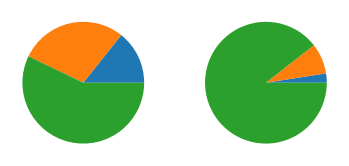

In [48]:
p=np.array([1.2, 2.4, 4.8])
p_=p/np.sum(p)

print(p_)

p2=np.exp(np.array([1.2, 2.4, 4.8]))     #softmax알고리즘
p2_= p2/np.sum(p2)

print(p2_)

plt.subplot(121)
plt.pie(p_)
plt.subplot(122)
plt.pie(p2)
#대비가 커졌음
# [0.02443891 0.08114005 0.89442104] 다 더하면 1

In [50]:
iris=datasets.load_iris()
list(iris.keys())

# print(iris.data)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [51]:
x=iris.data
y=iris.target

In [52]:
log_reg.fit(x,y)
log_reg.predict(x)   #최종레이블값, 목적값

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
np.mean(log_reg.predict(x)==y) 

0.9733333333333334

In [54]:
log_reg.predict_proba(x[0:10])

array([[9.81814805e-01, 1.81851810e-02, 1.43953228e-08],
       [9.71754998e-01, 2.82449715e-02, 3.01061907e-08],
       [9.85463134e-01, 1.45368538e-02, 1.23024373e-08],
       [9.76312124e-01, 2.36878365e-02, 3.96543113e-08],
       [9.85396810e-01, 1.46031782e-02, 1.19195533e-08],
       [9.70481415e-01, 2.95185111e-02, 7.33772420e-08],
       [9.86898254e-01, 1.31017266e-02, 1.99451613e-08],
       [9.76418016e-01, 2.35819561e-02, 2.75750515e-08],
       [9.79859915e-01, 2.01400545e-02, 3.06377205e-08],
       [9.69157782e-01, 3.08421863e-02, 3.15857429e-08]])

In [57]:
x=iris.data[:,0:2]      #데이터는 전체, 컬럼은 0번째부터 2개만 쓰겠ㄷㅏ
print(x)

y = iris.target

log_reg.fit(x,y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# iris = datasets.load_iris()
# list(iris.keys())

log_reg.predict(x)
np.mean(log_reg.predict(x) == y)


0.82

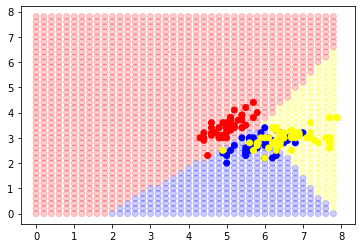

In [61]:
# 
xx, yy = np.mgrid[0:8:0.2, 0:8:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]
p = log_reg.predict(grid)


d=['red','blue','yellow']

colors = [d[i] for i in p]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

colors = [d[i] for i in y]
plt.scatter(x[:,0], x[:,1], color=colors)